<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/06proyecto/TS_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages("forecast")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


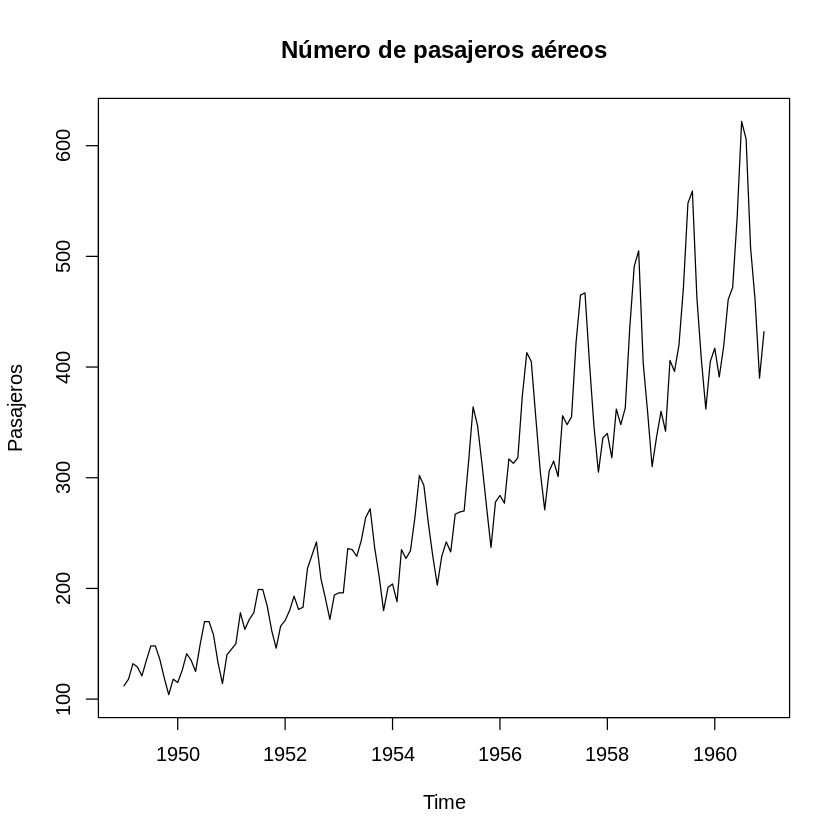

In [7]:
library(forecast)

# Datos de ejemplo
AirPassengers
ts_data <- AirPassengers
plot(ts_data, main = "Número de pasajeros aéreos", ylab = "Pasajeros")


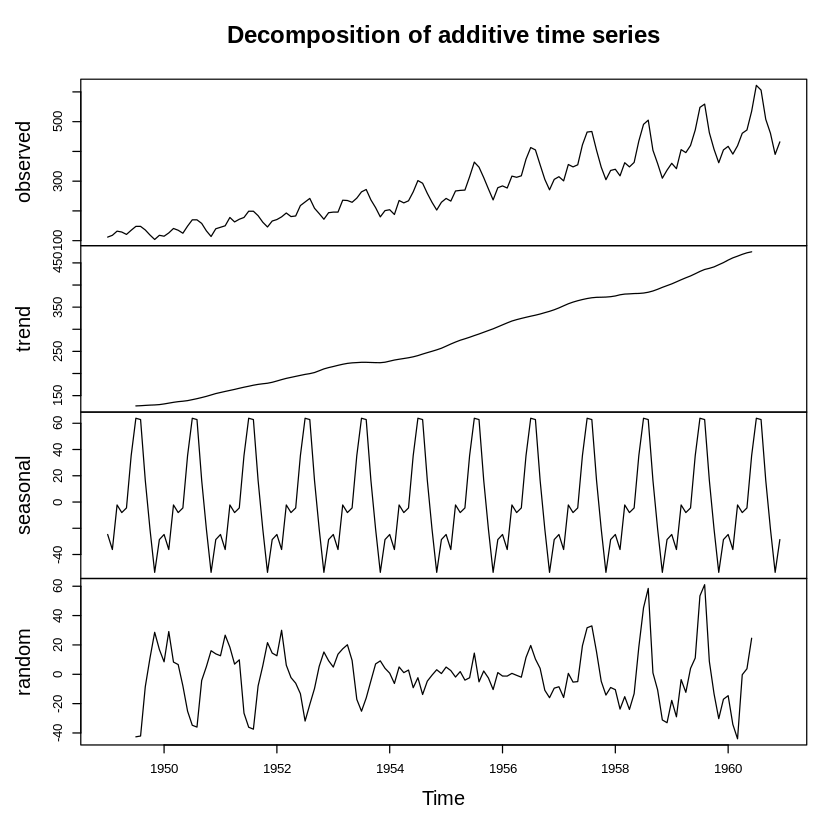

In [8]:
decomp <- decompose(ts_data)
plot(decomp)


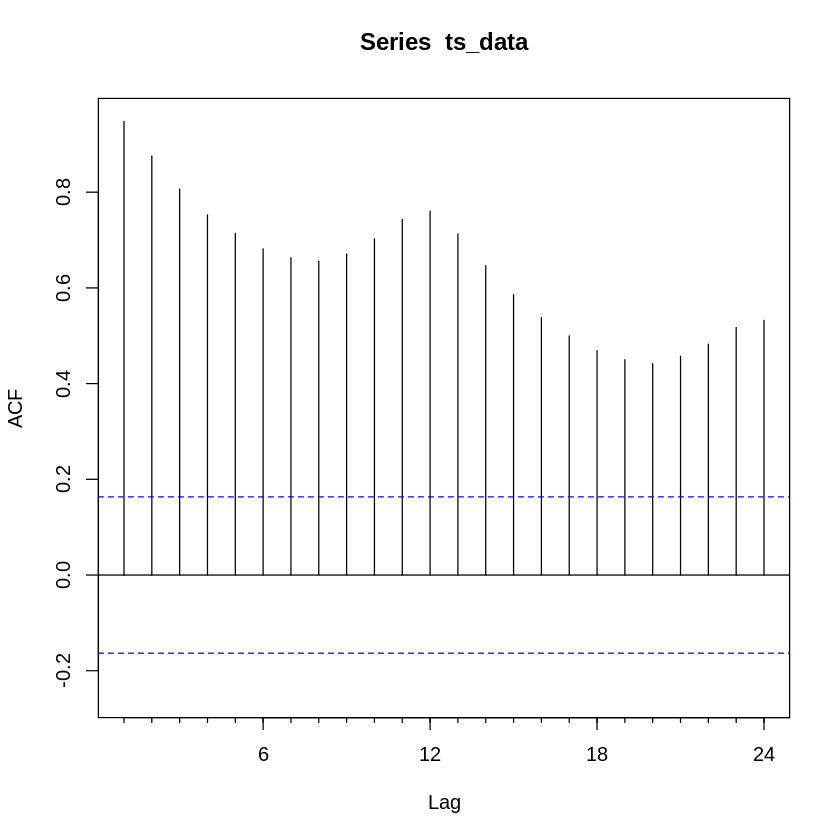

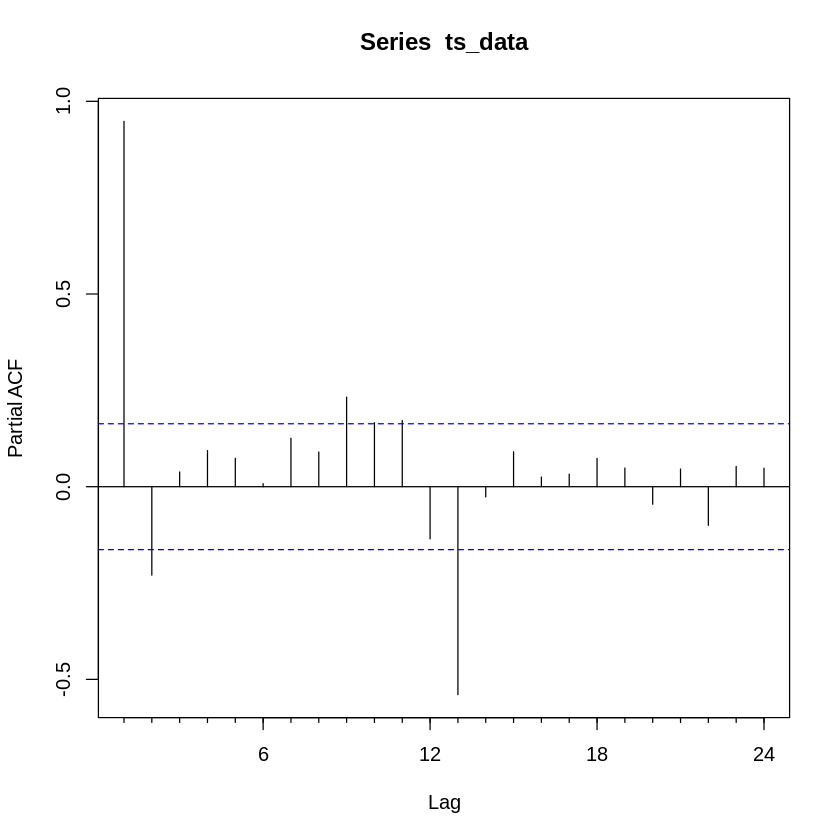

In [9]:
Acf(ts_data)
Pacf(ts_data)


In [10]:
modelo <- auto.arima(ts_data)
summary(modelo)


Series: ts_data 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE     MASE         ACF1
Training set 1.342299 10.84619 7.86754 0.4206976 2.800458 0.245628 -0.001248475

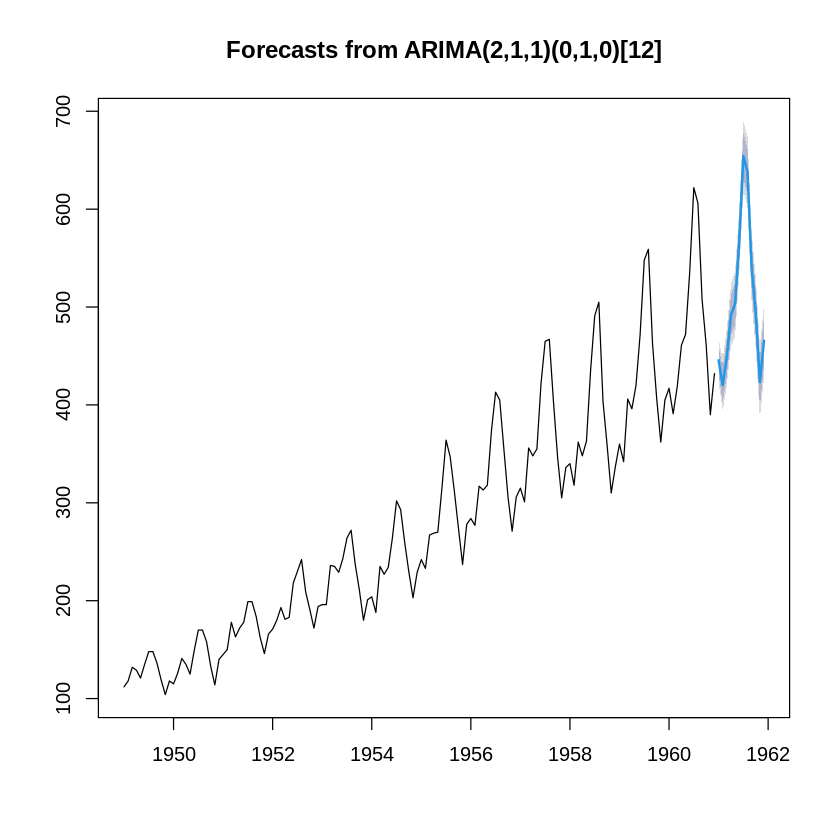

In [11]:
futuro <- forecast(modelo, h = 12)
plot(futuro)



# 📈 Análisis de Series de Tiempo en R (para usuarios de Python)

Este módulo está orientado a personas familiarizadas con Python (por ejemplo con `pandas`, `scikit-learn` o `statsmodels`) que quieran aprender a trabajar con series de tiempo en **R**.

---

## 🔍 ¿Qué es una serie de tiempo?

Una **serie de tiempo** es una secuencia de datos recolectados o registrados en momentos sucesivos, usualmente espaciados a intervalos regulares (por ejemplo: días, meses, trimestres).

**Ejemplos:**
- Número de pasajeros aéreos por mes (AirPassengers).
- Temperaturas diarias.
- Precio del dólar diario.

---

## 🧰 Paquetes principales en R para series de tiempo

- `forecast`: principal para modelos ARIMA, ETS, etc.
- `ts`: clase base para objetos de series temporales.
- `tseries`: para pruebas estadísticas (como Dickey-Fuller).
- `ggplot2`: visualización.
- `tsibble`, `fable`: versiones modernas (como `tidyverse` para ts).

---

## 📦 Ejemplo básico con datos embebidos

```r
library(forecast)

# Cargar la serie de pasajeros aéreos
ts_data <- AirPassengers
plot(ts_data)
```

---

## 🛠️ Componentes de una serie de tiempo

Una serie puede descomponerse en:

- **Tendencia**: cambio a largo plazo.
- **Estacionalidad**: patrones repetitivos.
- **Ruido**: variación aleatoria.

```r
decomp <- decompose(ts_data)
plot(decomp)
```

---

## 🔮 Predicción con ARIMA automático

```r
modelo <- auto.arima(ts_data)
summary(modelo)

# Predicción a 12 pasos (por ejemplo, 12 meses)
futuro <- forecast(modelo, h = 12)
plot(futuro)
```

La función `auto.arima()` selecciona automáticamente el mejor modelo ARIMA basado en el criterio AICc.

---

## 📏 Métricas para evaluar predicciones

Al igual que en Python, usamos métricas como:

- **MAE** (Mean Absolute Error)
- **RMSE** (Root Mean Squared Error)
- **MAPE** (Mean Absolute Percentage Error)

```r
accuracy(futuro)
```

Esto devuelve una tabla con las principales métricas de rendimiento para entrenamiento y test.

---

## 🔎 Datasets útiles embebidos en R

R viene con varias series listas para usar:

| Dataset         | Descripción                            |
|----------------|-----------------------------------------|
| `AirPassengers`| Pasajeros mensuales entre 1949-1960     |
| `nottem`       | Temperaturas mensuales en Nottingham    |
| `lynx`         | Capturas anuales de linces en Canadá    |
| `Nile`         | Flujo anual del río Nilo (1871–1970)    |
| `sunspot.year` | Número anual de manchas solares         |

```r
data()  # Muestra datasets disponibles
help(AirPassengers)  # Documentación
```

---

## 🔁 Comparación rápida con Python

| Acción                         | Python (`pandas`, `statsmodels`) | R (`forecast`, base)      |
|-------------------------------|----------------------------------|---------------------------|
| Crear serie                   | `pd.Series()` con índice `DatetimeIndex` | `ts()`                   |
| Visualizar                    | `matplotlib`, `seaborn`          | `plot()` o `ggplot2`     |
| ARIMA manual                  | `ARIMA` de `statsmodels`         | `arima()` o `auto.arima()`|
| Descomposición                | `seasonal_decompose`             | `decompose()`            |
| Métricas                      | `mean_squared_error`, etc.       | `accuracy()`             |
| Forecast                      | `.forecast()`                    | `forecast()`             |

---

## 📚 Recursos adicionales

- [Libros](https://otexts.com/fpp3/) — *Forecasting: Principles and Practice* (Rob J Hyndman)



# Modelos de Series de Tiempo: ARIMA, ARIMAX, SARIMA y SARIMAX

## 1. ARIMA (AutoRegressive Integrated Moving Average)

El modelo ARIMA(p, d, q) combina tres componentes:

| Componente | Significado | Intuición |
|------------|-------------|-----------|
| AR(p)      | AutoRegresivo: usa valores pasados | Como una regresión lineal sobre los valores anteriores |
| I(d)       | Integrado: diferencia para hacerlo estacionario | Elimina tendencia |
| MA(q)      | Media móvil: usa errores pasados | Promedia errores residuales |

Ejemplo en R:

```r
library(forecast)
modelo <- Arima(ts_data, order = c(1,1,1))  # ARIMA(1,1,1)
summary(modelo)
```

Equivalente en Python:

```python
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(serie, order=(1,1,1)).fit()
print(modelo.summary())
```

---

## 2. SARIMA (Seasonal ARIMA)

Extiende ARIMA agregando componente estacional, útil cuando los datos tienen patrones repetitivos (ej. mensuales o trimestrales).

SARIMA(p, d, q)(P, D, Q, s)

| Parte      | Significado                         |
|------------|-------------------------------------|
| (p,d,q)    | ARIMA clásico                       |
| (P,D,Q,s)  | Parte estacional: orden y periodo   |
| s          | Estacionalidad (ej. 12 si es mensual) |

Ejemplo en R:

```r
modelo <- Arima(ts_data, order = c(1,1,1), seasonal = c(1,1,1))
summary(modelo)
```

Python con `statsmodels` o `pmdarima`:

```python
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo = SARIMAX(serie, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
```

---

## 3. ARIMAX (ARIMA con Variables Exógenas)

El modelo ARIMAX es como ARIMA, pero incluye variables externas (exog) que podrían explicar el comportamiento de la serie (por ejemplo: clima, políticas, marketing).

Ejemplo en R:

```r
modelo <- Arima(ts_data, order = c(1,1,1), xreg = clima)
```

Ejemplo en Python:

```python
modelo = SARIMAX(serie, order=(1,1,1), exog=clima).fit()
```

---

## 4. SARIMAX (Seasonal ARIMAX)

Es el modelo más general. Une SARIMA + exógenas. Sirve cuando hay estacionalidad y también factores externos.

En R:

```r
modelo <- Arima(ts_data, order = c(1,1,1), seasonal = c(1,1,1), xreg = clima)
```

En Python:

```python
modelo = SARIMAX(serie, order=(1,1,1), seasonal_order=(1,1,1,12), exog=clima).fit()
```

---

## ¿Cómo elegir el mejor modelo?

1. Visualiza la serie: ¿hay tendencia o estacionalidad?
2. Aplica `auto.arima()` en R o `pmdarima.auto_arima()` en Python para elegir automáticamente.
3. Evalúa con AIC, BIC, RMSE.
4. Revisa los residuos: deben parecer ruido blanco.

---

## Resumen Comparativo

| Modelo   | Tendencia | Estacionalidad | Variables externas |
|----------|-----------|----------------|---------------------|
| ARIMA    | Sí        | No             | No                  |
| SARIMA   | Sí        | Sí             | No                  |
| ARIMAX   | Sí        | No             | Sí                  |
| SARIMAX  | Sí        | Sí             | Sí                  |



# Métricas y Conceptos Avanzados en Series de Tiempo

Este documento complementa la introducción a los modelos ARIMA/SARIMA/ARIMAX/SARIMAX con métricas adicionales y conceptos clave que fortalecen la evaluación y el diagnóstico de modelos de series temporales.

---

## Métricas adicionales de evaluación

| Métrica | Descripción | Uso |
|--------|-------------|-----|
| MAE (Mean Absolute Error) | Error absoluto medio | Intuitivo, robusto a outliers |
| RMSE (Root Mean Squared Error) | Raíz del error cuadrático medio | Penaliza más los errores grandes |
| MAPE (Mean Absolute Percentage Error) | Error porcentual medio | No recomendable si hay valores cercanos a cero |
| SMAPE (Symmetric MAPE) | Versión simétrica de MAPE | Útil con valores pequeños o nulos |
| R² (Coeficiente de determinación) | Varianza explicada por el modelo | No siempre fiable en series temporales |
| AIC (Akaike Information Criterion) | Penaliza la complejidad del modelo | Ideal para comparar modelos: menor AIC es mejor |
| BIC (Bayesian Information Criterion) | Similar a AIC con penalización mayor | Favorece modelos más simples |
| Diebold-Mariano Test | Prueba estadística para comparar modelos de predicción | Útil para validar si un modelo es significativamente mejor que otro |

---

## Conceptos esenciales

### Estacionariedad

Una serie es estacionaria si su media, varianza y autocorrelación son constantes en el tiempo. Es un supuesto necesario para muchos modelos clásicos como ARIMA.

- En R: `adf.test(serie)`
- En Python: `adfuller(serie)`

### Diferenciación

Proceso que convierte una serie no estacionaria en estacionaria aplicando restas sucesivas:

```r
diff(serie)
```

R también permite identificar cuántas diferencias aplicar:

```r
ndiffs(serie)
```

### ACF y PACF

- ACF: Autocorrelación en diferentes rezagos.
- PACF: Autocorrelación parcial, útil para identificar `p` en AR.

En R:

```r
Acf(serie)
Pacf(serie)
```

En Python:

```python
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
```

### Análisis de residuos

Se espera que los residuos del modelo sean ruido blanco (sin estructura ni autocorrelación). Se deben revisar gráficamente y con pruebas estadísticas.

En R:

```r
checkresiduals(modelo)
```

---

## Validación cruzada en series temporales

Es diferente a la validación aleatoria. Se usa backtesting con ventana móvil o creciente.

En R:

```r
tsCV()
```

En Python:

```python
from sklearn.model_selection import TimeSeriesSplit
```

---

## Visualizaciones recomendadas

- Descomposición (tendencia, estacionalidad, ruido)
- ACF y PACF
- Valores reales vs predicción
- Gráfico de residuos

---

## Alternativas modernas

| Modelo | Descripción |
|--------|-------------|
| Prophet | Modelo flexible desarrollado por Meta, ideal para datos con estacionalidades múltiples |
| XGBoost/LightGBM | Usados con ingeniería de variables temporales |
| LSTM/GRU | Modelos de redes neuronales recurrentes para secuencias complejas |
| Modelos estructurales (SSM) | Permiten modelar explícitamente la estructura de la serie: tendencia, estacionalidad y otros componentes |

---

Este conjunto de herramientas te permitirá tener un enfoque más robusto al trabajar con series de tiempo tanto en R como en Python.
